In [58]:
import pandas as pd
import numpy as np

In [86]:
data =  {'eng':[10,30,50,70,60],
         'kor':[20,40,60,80,75],
         'math':[90,50,20,70,30]}
df = pd.DataFrame(data, index=['a','b','c','d','e'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70
e,60,75,30


결측 데이터 처리
- 삭제
- 채우기( 대표값(평균, 중앙값, 최빈값), 보간법, 인접이웃 )

In [87]:
df.loc['b':'c','kor'] = np.nan
df.loc['c':'d','math'] = np.nan

In [88]:
df.isna() #nan 값에 대한 T,F Nan 有 True , Nan 無 False

,eng,kor,math
a,False,False,False
b,False,True,False
c,False,True,True
d,False,False,True
e,False,False,False


### 컬럼별 결측치 갯수확인

In [62]:
df.isna().sum() #nan이 컬럼별로 몇개가 있는지

eng     0
kor     2
math    2
dtype: int64

In [63]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 결측치 시각화

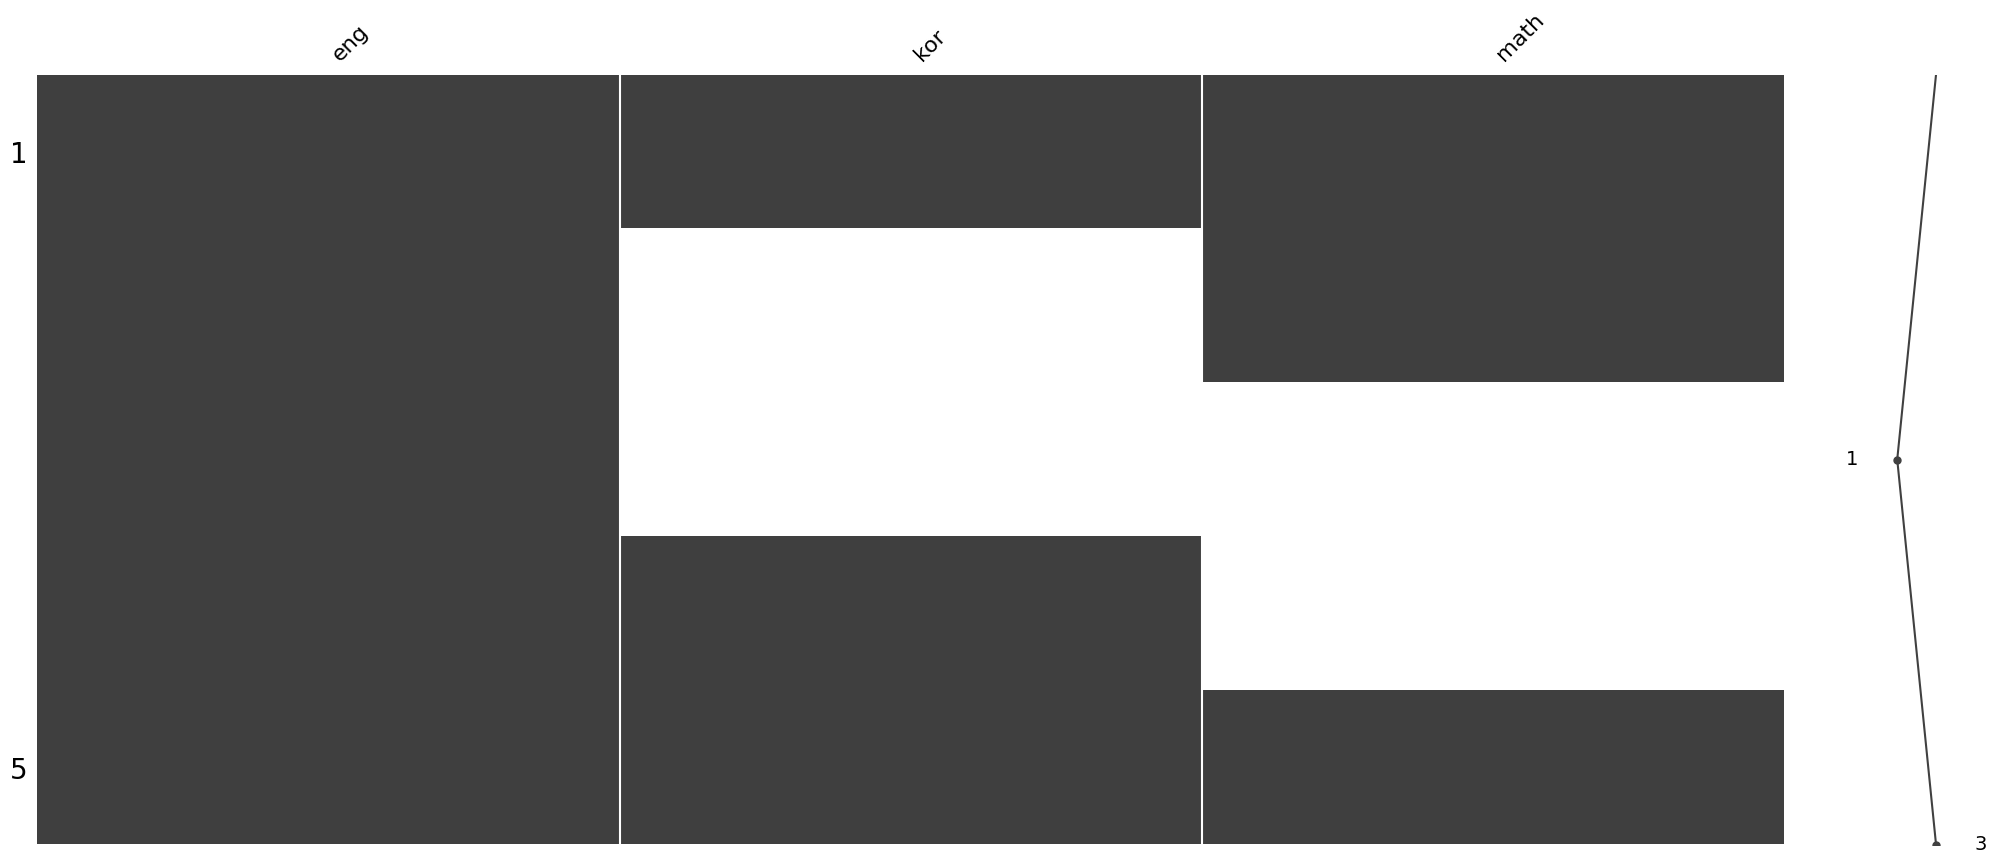

In [64]:
import missingno
import matplotlib.pyplot as plt
missingno.matrix( df )
plt.show()

In [65]:
### nan 삭제

In [89]:
df.dropna() #default = 0 행 삭제

,eng,kor,math
a,10,20.0,90.0
e,60,75.0,30.0


In [90]:
# df.dropna( axis=1) # 컬럼(열) 삭제
# df.dropna( axis='columns')
df.dropna( axis=1)  # 컬럼 적용

,eng
a,10
b,30
c,50
d,70
e,60


In [68]:
df.dropna( subset=['kor'] ) # kor 컬럼만 nan 행을 삭제

,eng,kor,math
a,10,20.0,90.0
d,70,80.0,NaN
e,60,75.0,30.0


In [ ]:
df.dropna( thresh=2 ) # 행에서 NaN이 아닌 값이 최소 2개 이상 있어야 유지한다  

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,50.0
d,70,80.0,NaN
e,60,75.0,30.0


In [ ]:
df.dropna( thresh=3 ) # 행에서 NaN이 아닌 값이 최소 3개 이상 있어야 유지한다 

,eng,kor,math
a,10,20.0,90.0
e,60,75.0,30.0


In [71]:
df.dropna(how='all') # 모든 행이 nan 이면 삭제 적용

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,50.0
c,50,NaN,NaN
d,70,80.0,NaN
e,60,75.0,30.0


In [72]:
### 값 채우기

In [75]:
df.fillna( { 'kor':0 , 'math': df['math'].mean() }).round(2)

,eng,kor,math
a,10,20.0,90.00
b,30,0.0,50.00
c,50,0.0,56.67
d,70,80.0,56.67
e,60,75.0,30.00


In [79]:
df['math']

a    90.0
b    50.0
c     NaN
d     NaN
e    30.0
Name: math, dtype: float64

In [85]:
# df['kor'].fillna( df['kor'].median(), inplace=True )
# df['kor'].fillna( df['kor'].median() )
df.fillna( {'kor': df['kor'].median()}, inplace=True )

In [ ]:
# 최빈값: 전체에서 가장 많은 값
sr = pd.Series([10,20,20,20,30,40,50])
sr.mode()[0] # df['kor'].mode()[0]

np.int64(20)

In [ ]:
# df['math'].sum(skipna=False) nan을 계산에 포함

### 보간법: 데이터 흐름상 자연스러운 값(선형보간)
------------
a      b
------------
1      100
2      Nan
3      300

------------
a      b
------------
1      10
2      Nan
3      Nan
4      40

In [98]:
# df['kor'] = df['kor'].interpolate() #보간함수
# df['kor'].interpolate(inplace=True) 
df['kor'].interpolate() 

a    20.0
b    40.0
c    60.0
d    80.0
e    75.0
Name: kor, dtype: float64

In [97]:
df

,eng,kor,math
a,10,20.0,90.0
b,30,NaN,50.0
c,50,NaN,NaN
d,70,80.0,NaN
e,60,75.0,30.0
